# K-means
An example for you to work through

In [18]:
# things we will need to do stuff in this notebook
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# two useful data viz libraries
import matplotlib.pyplot as plt
import seaborn as sns



# setup plotting in a notebook in a reasonable way
%matplotlib inline
%config InlineBackend.figure_format='retina'

# default figure aesthetics I'll be using, 
# there are other choices, see seaborn docs
sns.set_style("white")
sns.set_context("notebook")

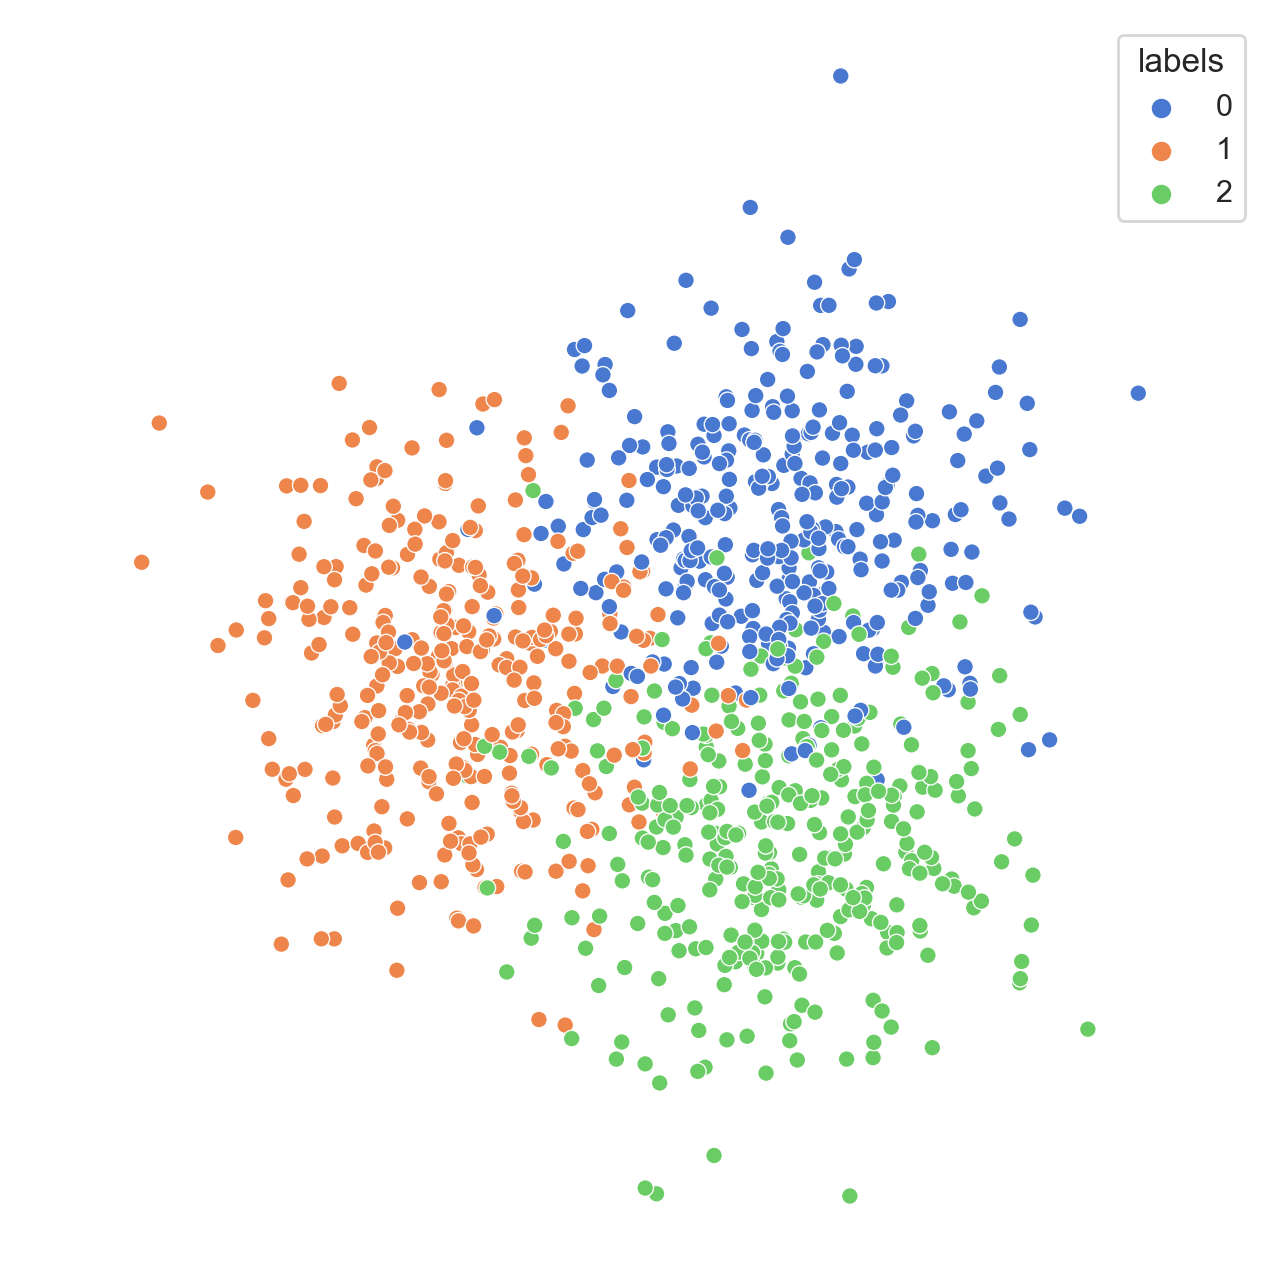

In [19]:
points, labels = make_blobs(
    cluster_std=7.0, n_samples=1000, n_features=2, random_state=42, centers=[ [10,10], [-10,0], [10,-10]]
)

pts = pd.DataFrame(points,columns=['x','y'])
pts['labels']=labels

fig = plt.figure(figsize=(8, 8))
ax = plt.axes()

sns.scatterplot(data=pts,x='x',y='y',hue='labels',ax=ax,palette='muted');
plt.axis('equal');
plt.axis('off');

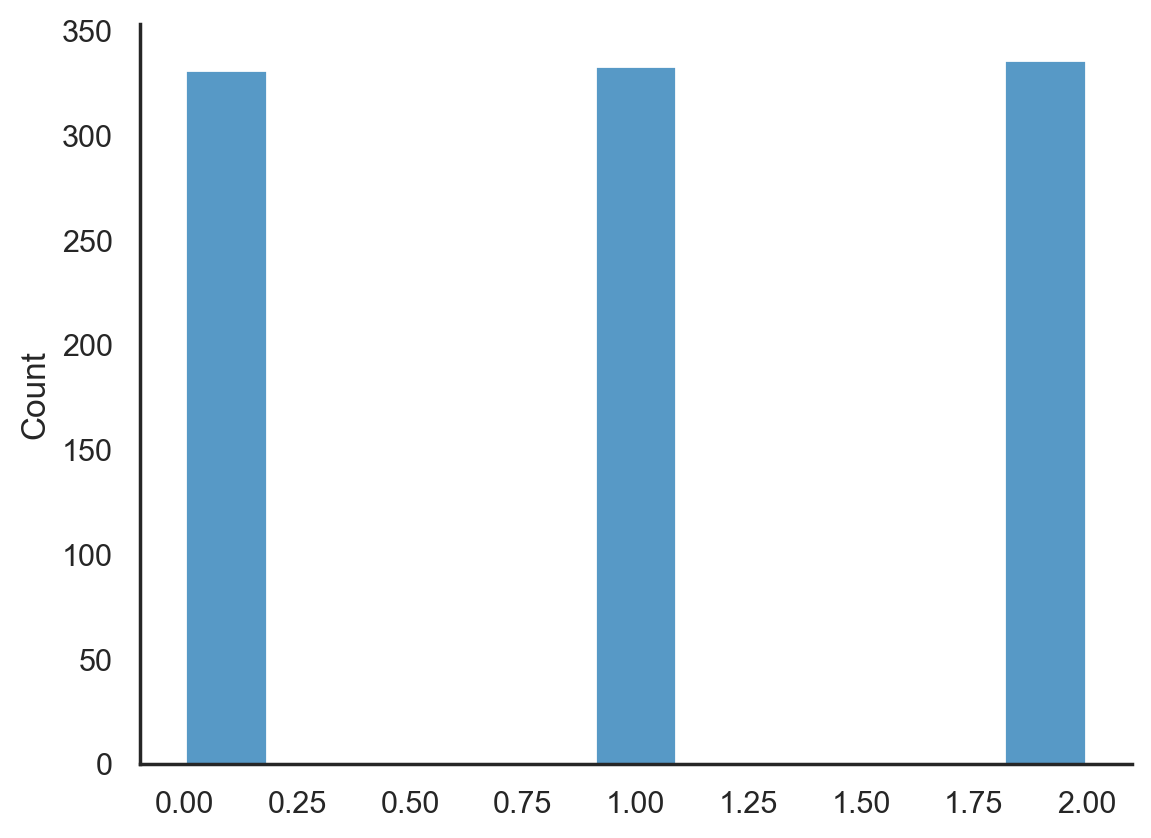

In [22]:
k_3 = KMeans(n_clusters=3)
clust_labels = k_3.fit_predict(points)


# pretty equal amounts of data in each cluster
# you would expect this with equal variance convex clusters
# but if this is NOT true it may indicate you do not have the above
sns.histplot(clust_labels)
sns.despine();

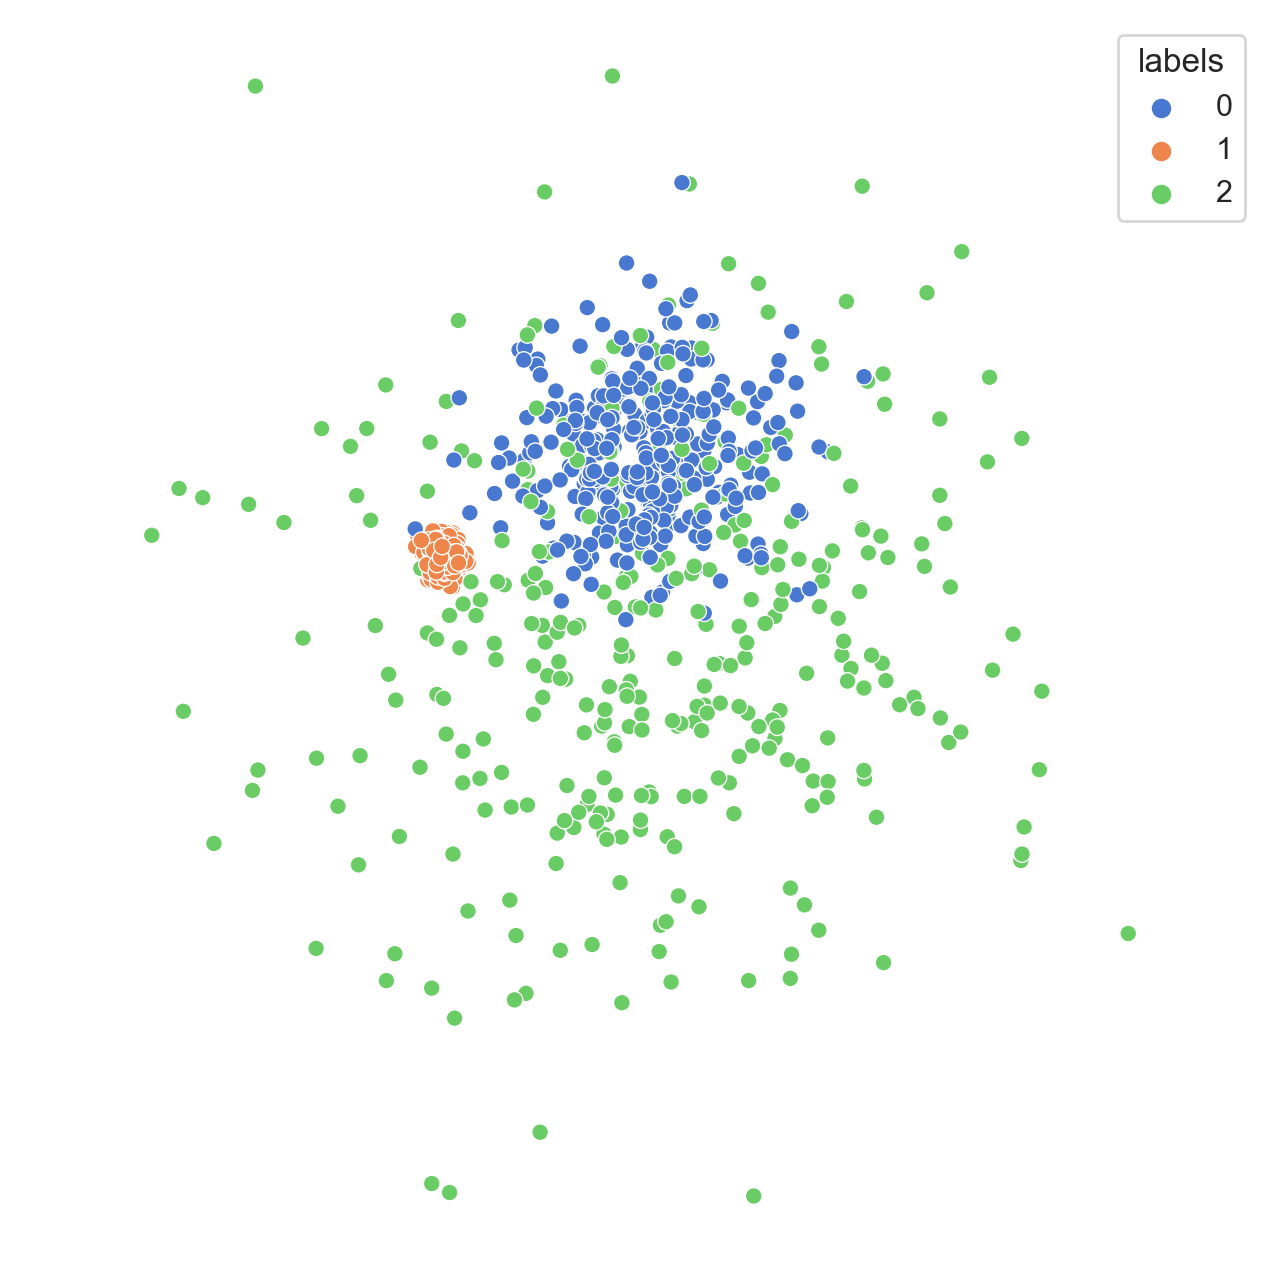

In [26]:
points, labels = make_blobs(
    cluster_std=[7.0, 1.0, 18.], n_samples=1000, n_features=2, random_state=42, centers=[ [10,10], [-10,0], [10,-10]]
)

pts = pd.DataFrame(points,columns=['x','y'])
pts['labels']=labels

fig = plt.figure(figsize=(8, 8))
ax = plt.axes()

sns.scatterplot(data=pts,x='x',y='y',hue='labels',ax=ax,palette='muted');
plt.axis('equal');
plt.axis('off');


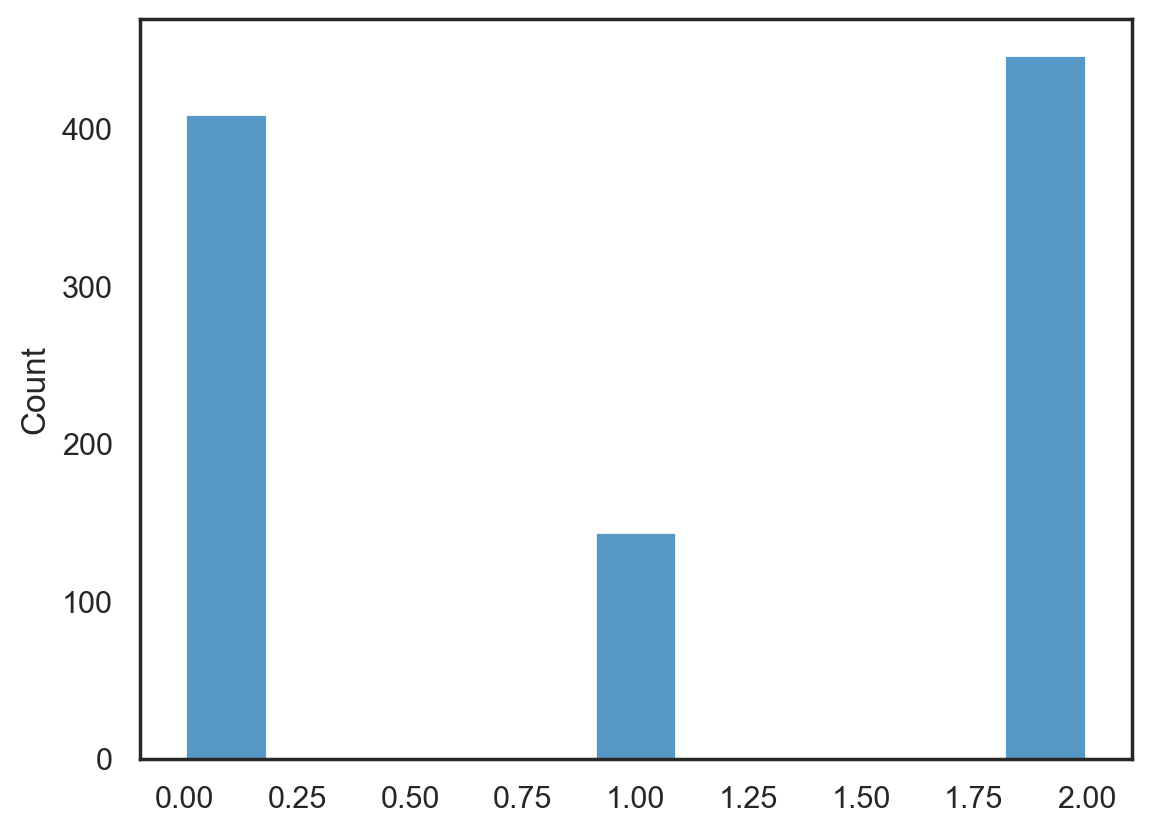

In [27]:
clust_labels = k_3.fit_predict(points)
# pretty equal amounts of data in each cluster
# you would expect this with equal variance convex clusters
# but if this is NOT true it may indicate you do not have the above
sns.histplot(clust_labels);

In [29]:
# likewise if we wish to compare different possible clusterings 
# a higher/lower silhouette is associated with a better/worse clustering
# see https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

points, labels = make_blobs(
    cluster_std=7.0, n_samples=1000, n_features=2, random_state=42, centers=[ [10,10], [-10,0], [10,-10]]
)

for n_cl in [2, 3, 4, 5, 6, 7, 8]:
    km=KMeans(n_clusters=n_cl)
    clust_labels = km.fit_predict(points)
    print(str(n_cl)+' clusters: silhouette score=', silhouette_score(points, clust_labels) )

2 clusters: silhouette score= 0.37461938423104074
3 clusters: silhouette score= 0.4401940589534049
4 clusters: silhouette score= 0.3664519679275494
5 clusters: silhouette score= 0.33762105556786115
6 clusters: silhouette score= 0.3328949106964911
7 clusters: silhouette score= 0.3236029175977711
8 clusters: silhouette score= 0.33398286095831237
